<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/tensorflow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# imports tensorflow library
import tensorflow as tf

# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# initiaizes two constant variables
var1 = tf.constant([1,2,3,4])
var2 = tf.constant([5,6,7,8])

# multiplies variables var1 and var2 
result = tf.multiply(var1, var2)

# prints result
print(result)

tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)


In [ ]:
# unzips neccessarry zip files in Drive
# only needs to be run once for your Drive
!unzip -uq "/content/drive/My Drive/BelgiumTSC_Training" -d "/content/drive/My Drive/TrafficSigns/Training"
!unzip -uq "/content/drive/My Drive/BelgiumTSC_Testing" -d "/content/drive/My Drive/TrafficSigns/Testing"

In [ ]:
import os
from skimage import io

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
            print(f)
    return images, labels

ROOT_PATH = "/content/drive/MyDrive"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing/Testing")

images, labels = load_data(train_data_directory)



In [ ]:
import numpy as np

images_array = np.array(images)

# Print the `images` dimensions
print(images_array.ndim)

# Print the number of `images`'s elements
print(images_array.size)

# Print the first instance of `images`
print(images_array[0])

In [17]:
labels_array= np.array(labels)

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

1
4575
62


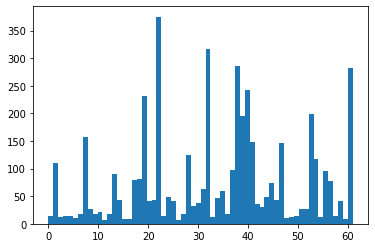

In [18]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

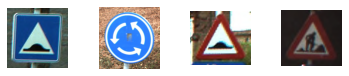

In [19]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

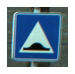

shape: (127, 129, 3), min: 0, max: 255


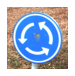

shape: (372, 367, 3), min: 17, max: 255


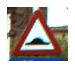

shape: (74, 83, 3), min: 0, max: 255


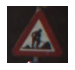

shape: (79, 85, 3), min: 6, max: 255


In [20]:
# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

In [23]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, np.count_nonzero(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

AttributeError: ignored

<Figure size 1080x1080 with 0 Axes>

In [25]:
from skimage import transform

# Resize images
images32 = [transform.resize(image, (28, 28)) for image in images]
images32 = np.array(images32)

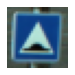

shape: (28, 28, 3), min: 0.02024559823929577, max: 0.907439225690276


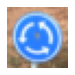

shape: (28, 28, 3), min: 0.1568627450980392, max: 0.9921568627450981


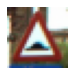

shape: (28, 28, 3), min: 0.052065826330532326, max: 0.996078431372549


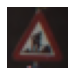

shape: (28, 28, 3), min: 0.08200280112044822, max: 0.5665878851540612


In [26]:
# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32[traffic_signs[i]].shape, 
                                                  images32[traffic_signs[i]].min(), 
                                                  images32[traffic_signs[i]].max()))

In [28]:
from skimage.color import rgb2gray

images32 = rgb2gray(np.array(images32))

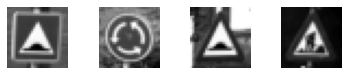

(4575, 28, 28)


In [29]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images32.shape)

In [37]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])


In [40]:
from tensorflow import contrib

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

ImportError: ignored

In [39]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

AttributeError: ignored

In [ ]:
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

In [ ]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [ ]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))